In [35]:
#First we import all the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import numpy as np

In [ ]:
#Then we load the cleaned data

df = pd.read_parquet(r"E:\BA-Project\Industry-EnergyCO2-Consumption-Data-Anaysis\processed_data\cleaned_data.parquet")
df.head()

,registryID,fuelTypeStd,energyMJq0,energyMJq2,energyMJq3,throughputTonneQ0,throughputTonneQ2,throughputTonneQ3,ghgsTonneCO2eQ0,ghgsTonneCO2eQ2,...,weeklyOpHoursLow_q3,weeklyOpHoursLow_q4,weeklyOpHours_q1,weeklyOpHours_q2,weeklyOpHours_q3,weeklyOpHours_q4,weeklyOpHoursHigh_q1,weeklyOpHoursHigh_q2,weeklyOpHoursHigh_q3,weeklyOpHoursHigh_q4
0,110041038098.0,diesel,0.000303,3.132848,5.819856,1.962375e+02,4.190191e+02,5.888033e+02,2.133500e-08,0.000220,...,50.992000,51.544,64.2,69.1,67.7,64.3,87.704000,91.192,82.444,81.332000
1,110070522664.0,naturalGas,0.000325,1.184160,7.860410,1.962375e+02,4.190191e+02,5.888033e+02,1.634686e-08,0.000060,...,90.728000,83.288,93.2,103.2,111.7,102.3,109.271996,123.780,132.672,121.312004
2,110000426913.0,naturalGas,0.000332,76.074302,76.522121,5.449402e-09,5.449402e-09,5.449402e-09,1.851187e-06,0.000002,...,43.591995,41.556,78.2,70.6,67.7,78.6,102.700000,95.296,91.808,115.644000
3,110042051089.0,naturalGas,0.000333,2797.245096,2874.676155,1.962375e+02,4.190191e+02,5.888033e+02,1.674315e-08,0.140813,...,50.992000,51.544,64.2,69.1,67.7,64.3,87.704000,91.192,82.444,81.332000
4,110000427538.0,lpgHGL,0.000346,76.382437,77.648000,1.962375e+02,4.190191e+02,5.888033e+02,5.426127e-06,0.000005,...,40.552002,42.796,54.9,52.7,52.9,52.4,69.012000,64.264,65.248,62.004000


In [ ]:

df.columns

Index(['registryID', 'fuelTypeStd', 'energyMJq0', 'energyMJq2', 'energyMJq3',
       'throughputTonneQ0', 'throughputTonneQ2', 'throughputTonneQ3',
       'ghgsTonneCO2eQ0', 'ghgsTonneCO2eQ2', 'ghgsTonneCO2eQ3', 'unitTypeStd',
       'energyEstimateSource', 'ghgsEstimateSource', 'siteTypeName', 'name',
       'locationAddress', 'postalCode', 'cityName', 'countyName', 'stateCode',
       'countyFIPS', 'latitude', 'longitude', 'naicsCode',
       'weeklyOpHoursLow_q1', 'weeklyOpHoursLow_q2', 'weeklyOpHoursLow_q3',
       'weeklyOpHoursLow_q4', 'weeklyOpHours_q1', 'weeklyOpHours_q2',
       'weeklyOpHours_q3', 'weeklyOpHours_q4', 'weeklyOpHoursHigh_q1',
       'weeklyOpHoursHigh_q2', 'weeklyOpHoursHigh_q3', 'weeklyOpHoursHigh_q4'],
      dtype='object')

## How many facilities are in the dataset (unique registryID)

In [6]:
number_of_facilities = df['registryID'].nunique()
print(f"Number of unique facilities: {number_of_facilities}")

Number of unique facilities: 502165


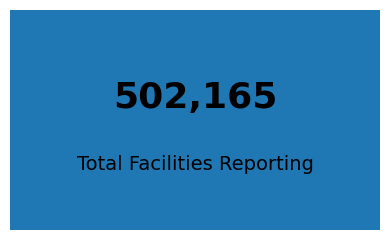

In [ ]:
#We defined a function to create a KPI card similar to Power BI cards

def kpi_card(title, value, figsize=(4,2.5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis("off")

    # Card background
    bbox = FancyBboxPatch(
        (0.1, 0.1), 0.8, 0.8, 
        boxstyle="round,pad=0.3,rounding_size=0.15",
        linewidth=1.5,
        fill=True,
        edgecolor="black"
    )
    ax.add_patch(bbox)

    # KPI value
    ax.text(
        0.5, 0.6, f"{value:,}", 
        ha="center", va="center", fontsize=26, fontweight="bold"
    )

    # Title
    ax.text(
        0.5, 0.3, title, 
        ha="center", va="center", fontsize=14
    )

    plt.tight_layout()
    plt.show()

kpi_card("Total Facilities Reporting", number_of_facilities)

## What is the average energy consumption (energyMJ*) by quartile


In [12]:
energy_cols = ["energyMJq0", "energyMJq2", "energyMJq3"]
avg_energy = df[energy_cols].mean()

print("Average energy consumption by quartile:")
print(avg_energy)

Average energy consumption by quartile:
energyMJq0    1.311149e+07
energyMJq2    2.737443e+07
energyMJq3    3.701377e+07
dtype: float64


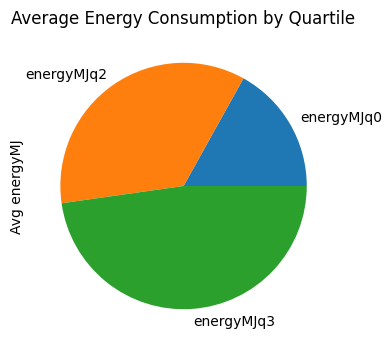

In [49]:
plt.figure(figsize=(6,4))
avg_energy.plot(kind='pie')
plt.title("Average Energy Consumption by Quartile")
plt.ylabel("Avg energyMJ")
plt.show()

## What is the total energy consumption per facility?

In [13]:
df['totalEnergyMJ'] = df[energy_cols].sum(axis=1, skipna=True)
total_energy_per_facility = df.groupby('name')['totalEnergyMJ'].sum().sort_values(ascending=False).head(10)
print("Total energy consumption per facility:") 
print(total_energy_per_facility)

Total energy consumption per facility:
name
TESORO LOS ANGELES RFNRY                                    3.760184e+12
EDGAR THOMSON PLNT                                          6.691786e+11
GRNT ROCK                                                   3.617767e+11
US STL GRT LAKES WORKS                                      2.677243e+11
MARTINEZ RFNRY PREVIOUSLY SHL OIL PROD US MARTINEZ RFNRY    2.671272e+11
LAKE CHARLES CHEM COMPLEX                                   2.502453e+11
SYAR IND                                                    2.390293e+11
GRAYMONT PA PLSNT GAP CON LIME AND BELLEFONTE PLTS          2.365554e+11
PEETS COF AND TEA                                           2.364326e+11
CLEMENS FOOD GRP HATFIELD PLNT                              2.226010e+11
Name: totalEnergyMJ, dtype: float64


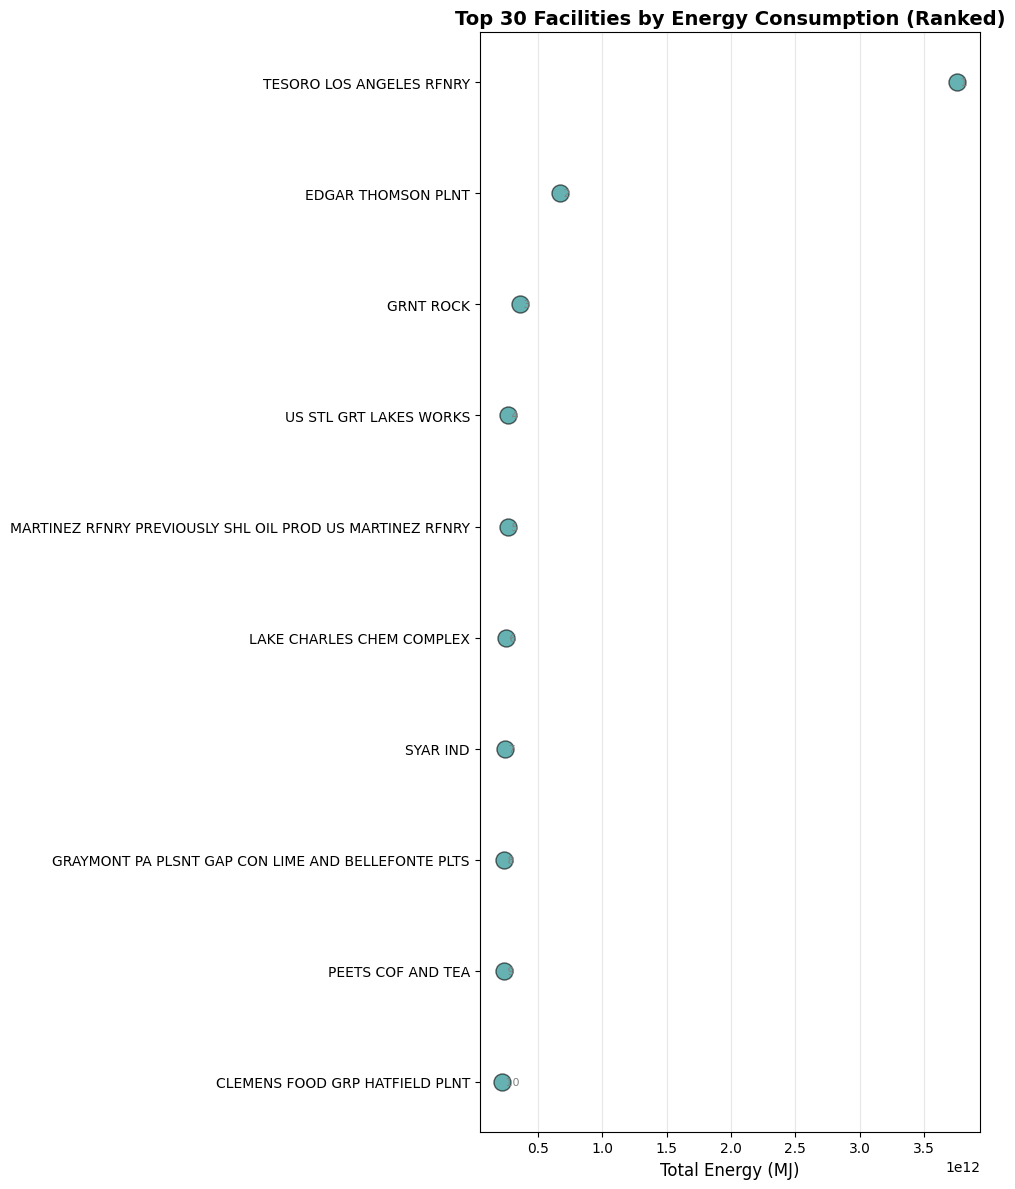

In [36]:
fig, ax = plt.subplots(figsize=(10, 12))
facilities = total_energy_per_facility.head(30)
y_pos = np.arange(len(facilities))

ax.scatter(facilities.values, y_pos, s=150, alpha=0.6, color='teal', edgecolors='black', linewidth=1)
for i, (facility, value) in enumerate(facilities.items()):
    ax.text(value, i, f' {i+1}', va='center', fontsize=8, color='gray')
    
ax.set_yticks(y_pos)
ax.set_yticklabels(facilities.index)
ax.set_xlabel('Total Energy (MJ)', fontsize=12)
ax.set_title('Top 30 Facilities by Energy Consumption (Ranked)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

## Which NAICS industries consume the highest energy?

In [15]:
def map_naics_sector(naics):
    if pd.isna(naics):
        return "Unknown"
    
    # Convert to string, remove decimals (e.g., "324110.0" → "324110")
    code = str(naics).split('.')[0]
    
    # Extract first 2 digits (sector level)
    try:
        prefix = int(code[:2])
    except:
        return "Unknown"

    # Apply your mapping
    if prefix == 11:
        return "Agriculture, Forestry, Fishing and Hunting"
    elif prefix == 23:
        return "Construction"
    elif 31 <= prefix <= 33:
        return "Manufacturing"
    elif 44 <= prefix <= 45:
        return "Retail Trade"
    elif prefix == 51:
        return "Information"
    elif prefix == 54:
        return "Professional, Scientific, and Technical Services"
    elif prefix == 56:
        return "Administrative & Waste Management Services"
    elif prefix == 61:
        return "Educational Services"
    elif prefix == 71:
        return "Arts, Entertainment, and Recreation"
    elif prefix == 72:
        return "Accommodation and Food Services"
    elif prefix == 21:
        return "Mining, Quarrying, and Oil and Gas Extraction"
    else:
        return "Other / Not Listed"


df['naicsSector'] = df['naicsCode'].apply(map_naics_sector)
df[['naicsCode', 'naicsSector']].head(10)

,naicsCode,naicsSector
0,334412.0,Manufacturing
1,311812.0,Manufacturing
2,325510.0,Manufacturing
3,334417.0,Manufacturing
4,336999.0,Manufacturing
5,336999.0,Manufacturing
6,336999.0,Manufacturing
7,212221.0,"Mining, Quarrying, and Oil and Gas Extraction"
8,311512.0,Manufacturing
9,332312.0,Manufacturing


In [17]:
total_energy_per_naics_industry = df.groupby('naicsSector')['totalEnergyMJ'].sum().sort_values(ascending=False).head(10)
print("Total energy consumption per NAICS industry:") 
print(total_energy_per_naics_industry)

Total energy consumption per NAICS industry:
naicsSector
Manufacturing                                    3.287781e+13
Mining, Quarrying, and Oil and Gas Extraction    8.722287e+12
Construction                                     1.978552e+12
Agriculture, Forestry, Fishing and Hunting       9.291077e+11
Name: totalEnergyMJ, dtype: float64


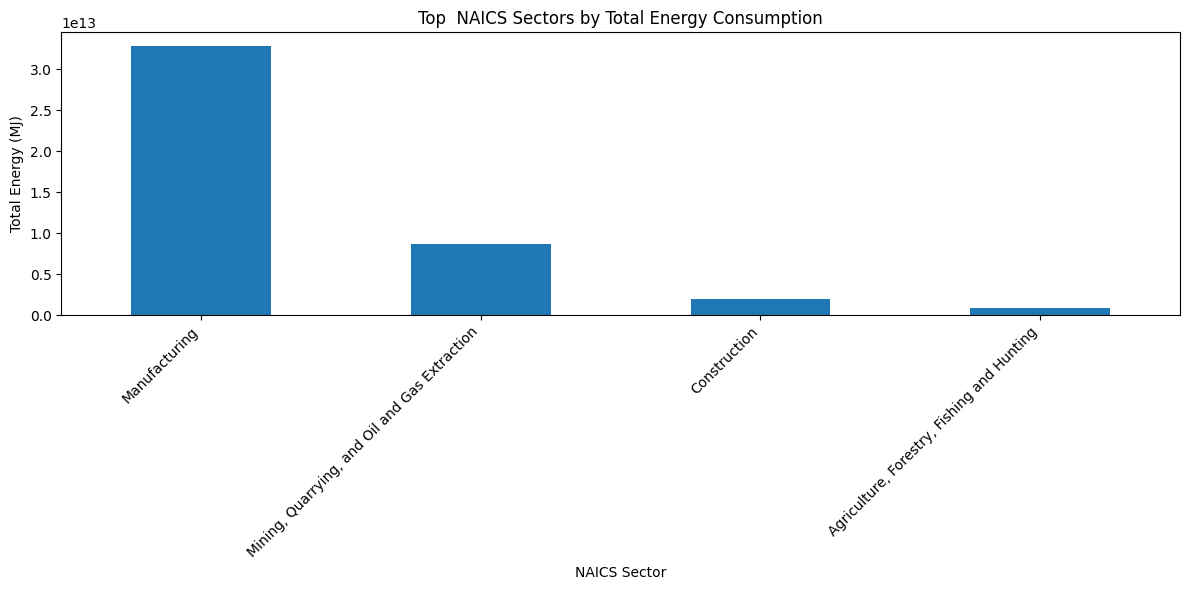

In [19]:
plt.figure(figsize=(12, 6))
total_energy_per_naics_industry.plot(kind='bar')
plt.title("Top  NAICS Sectors by Total Energy Consumption")
plt.xlabel("NAICS Sector")
plt.ylabel("Total Energy (MJ)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Which cities have the highest energy usage?

In [20]:
total_energy_per_city = df.groupby('cityName')['totalEnergyMJ'].sum().sort_values(ascending=False).head(10)
print("Total energy consumption per city:")
print(total_energy_per_city)

Total energy consumption per city:
cityName
CARSON            3.764234e+12
BRADDOCK HILLS    6.691786e+11
MARTINEZ          4.455824e+11
NEW RAYMER        3.055176e+11
HAYWARD           2.857153e+11
ECORSE            2.682637e+11
PITTSBURGH        2.679933e+11
KERSEY            2.663876e+11
WESTLAKE          2.615072e+11
SULPHUR           2.390910e+11
Name: totalEnergyMJ, dtype: float64


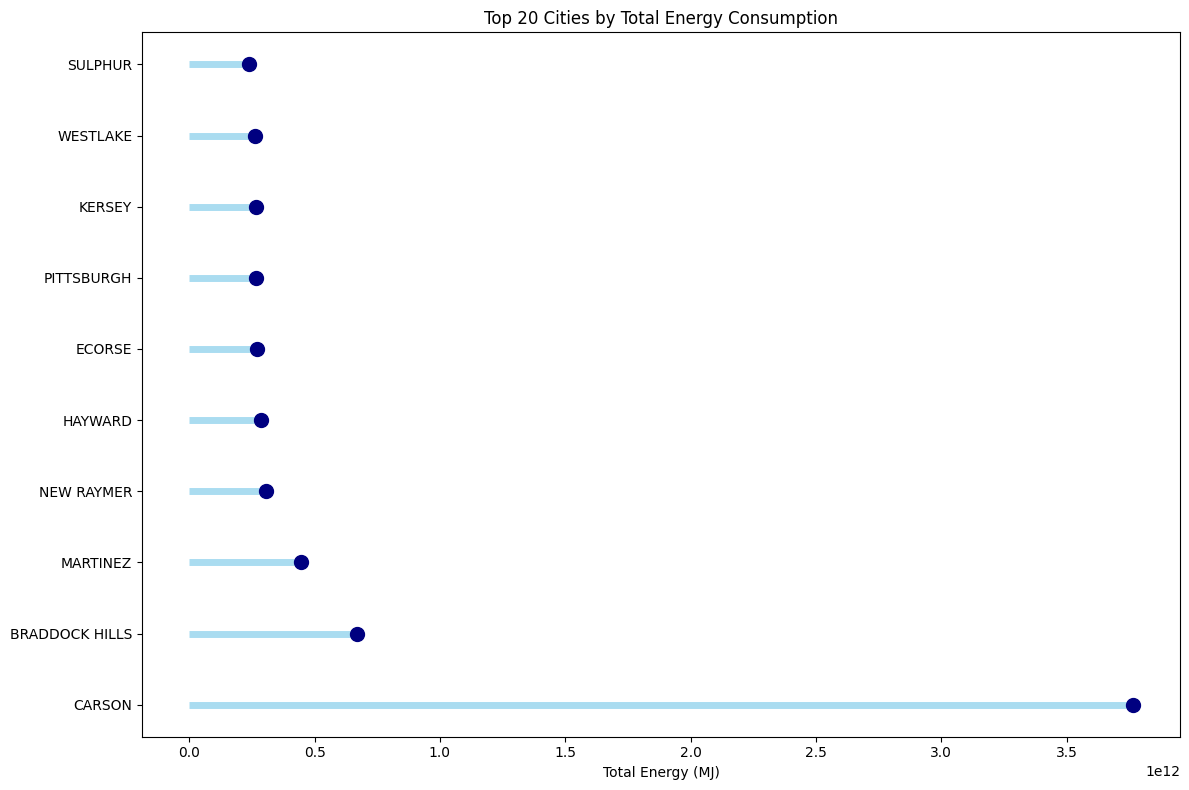

In [33]:
plt.figure(figsize=(12, 8))
y_pos = range(len(total_energy_per_city.head(20)))
plt.hlines(y=y_pos, xmin=0, xmax=total_energy_per_city.head(20).values, color='skyblue', alpha=0.7, linewidth=5)
plt.plot(total_energy_per_city.head(20).values, y_pos, "o", markersize=10, color='navy')
plt.yticks(y_pos, total_energy_per_city.head(20).index)
plt.xlabel("Total Energy (MJ)")
plt.title("Top 20 Cities by Total Energy Consumption")
plt.tight_layout()
plt.show()

## What is the distribution of ghgsTonneCO2e across Q0/Q2/Q3?

In [21]:
ghgs_cols = ['ghgsTonneCO2eQ0', 'ghgsTonneCO2eQ2', 'ghgsTonneCO2eQ3']
green_house_gas_emmissions_per_quartile = df[ghgs_cols].mean()
print("Average Green House Gas Emmissions by quartile:")
print(green_house_gas_emmissions_per_quartile.sort_values(ascending=False))

Average Green House Gas Emmissions by quartile:
ghgsTonneCO2eQ3    169890.569289
ghgsTonneCO2eQ2    140567.585450
ghgsTonneCO2eQ0     62992.387070
dtype: float64


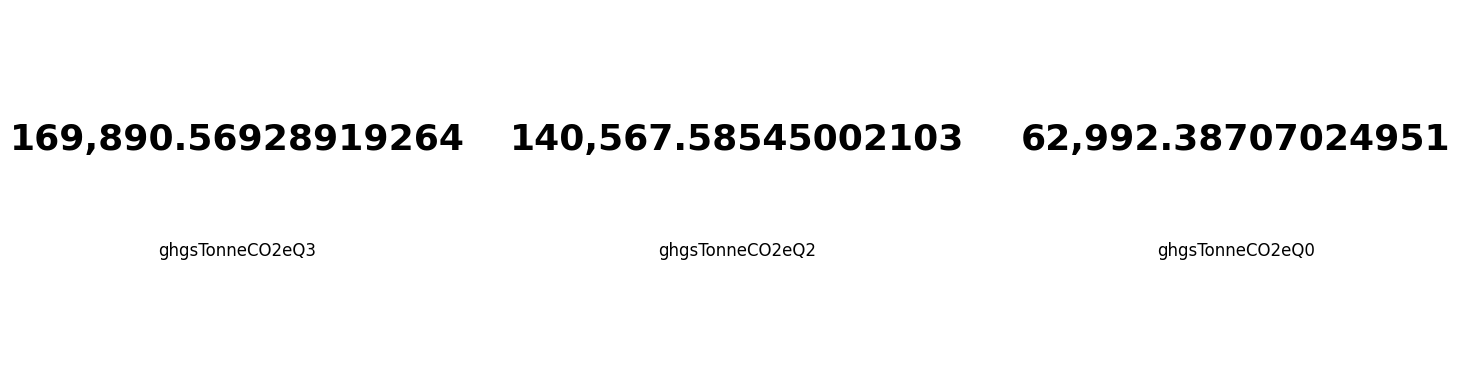

In [19]:
def plot_kpi_cards(cards, figsize=(15,4)):

    fig, axarr = plt.subplots(1, len(cards), figsize=figsize)
    
    for ax, (title, value) in zip(axarr, cards):
        ax.axis("off")
        bbox = FancyBboxPatch(
            (0.05, 0.05), 0.9, 0.9,
            boxstyle="round,pad=0.3,rounding_size=0.15",
            linewidth=1.5, fill=False
        )
        ax.add_patch(bbox)
        
        ax.text(0.5, 0.65, f"{value:,}", ha="center", va="center", fontsize=26, fontweight="bold")
        ax.text(0.5, 0.35, title, ha="center", va="center", fontsize=12)

    plt.tight_layout()
    plt.show()


cards = [
    ("ghgsTonneCO2eQ3", df['ghgsTonneCO2eQ3'].mean()),
    ("ghgsTonneCO2eQ2",df['ghgsTonneCO2eQ2'].mean()),
    ("ghgsTonneCO2eQ0", df['ghgsTonneCO2eQ0'].mean()),
]

plot_kpi_cards(cards)


## Which sectors (NAICS codes) produce the most GHG?

In [28]:
df["Total_ghg_emmissions"] = df[ghgs_cols].sum(axis=1, skipna=True)
total_ghg_per_naics = df.groupby('naicsSector')['Total_ghg_emmissions'].sum().sort_values(ascending=False).head(10)
print("Total Green House Gas Emmissions per NAICS industry code:")
print(total_ghg_per_naics)

Total Green House Gas Emmissions per NAICS industry code:
naicsSector
Manufacturing                                    2.038500e+11
Construction                                     6.755849e+09
Mining, Quarrying, and Oil and Gas Extraction    3.120123e+09
Agriculture, Forestry, Fishing and Hunting       7.451841e+08
Name: Total_ghg_emmissions, dtype: float64


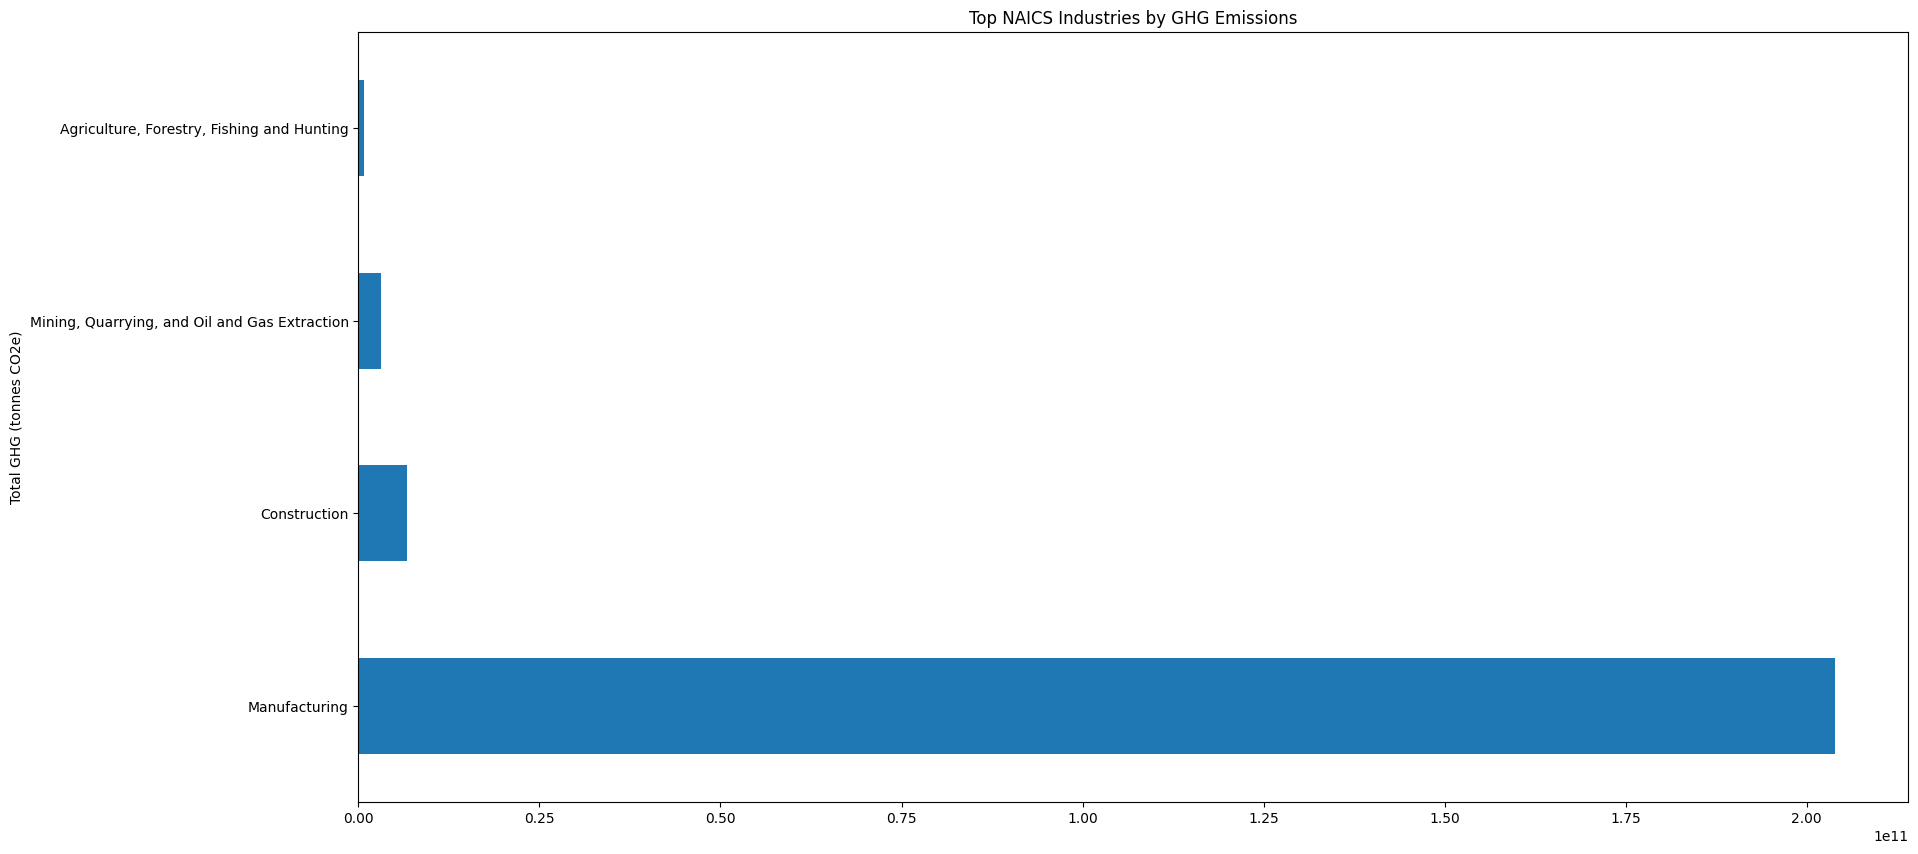

In [32]:
plt.figure(figsize=(20,10))
total_ghg_per_naics.head(15).plot(kind='barh')
plt.title("Top NAICS Industries by GHG Emissions")
plt.ylabel("Total GHG (tonnes CO2e)")
plt.show()

## Is there a correlation between energyMJ and GHG emissions?

In [22]:
df[["Total_ghg_emmissions", "totalEnergyMJ"]].corr()

,Total_ghg_emmissions,totalEnergyMJ
Total_ghg_emmissions,1.000000,0.012993
totalEnergyMJ,0.012993,1.000000


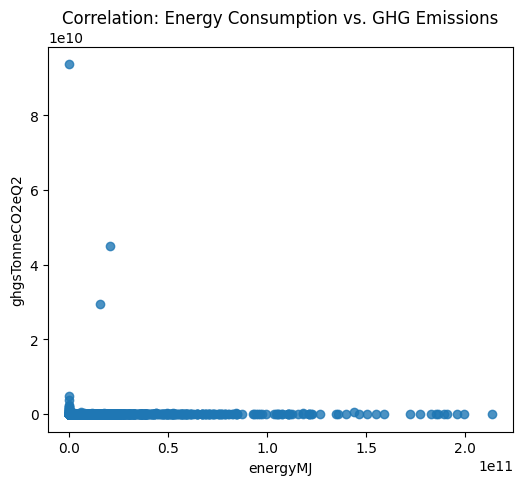

In [38]:
plt.figure(figsize=(6,5))
plt.scatter(df['totalEnergyMJ'], df['Total_ghg_emmissions'], alpha=0.8)
plt.title("Correlation: Energy Consumption vs. GHG Emissions")
plt.xlabel("energyMJ")
plt.ylabel("ghgsTonneCO2eQ2")
plt.show()

## Which facilities are outliers in terms of high CO2 emissions?

In [ ]:
Q1 = df['Total_ghg_emmissions'].quantile(0.25)
Q3 = df['Total_ghg_emmissions'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df['Total_ghg_emmissions'] > Q3 + 1.5 * IQR]

top_outliers = outliers[[]].sort_values(by='Total_ghg_emmissions', ascending=False).head(10)
print(top_outliers[['registryID', 'name', 'Total_ghg_emmissions', 'naicsCode', 'cityName', 'stateCode']])


           registryID                                               name  \
85572  110000331999.0                                               <NA>   
36002  110000584706.0                           BRASKEM AMER MARCUS HOOK   
30795  110000584706.0                           BRASKEM AMER MARCUS HOOK   
87192  110011575456.0                  CAMBRIDGE LEE IND PLT 2ND AND 4TH   
42909  110000483245.0  MARTINEZ RFNRY PREVIOUSLY SHL OIL PROD US MART...   
86865  110001204580.0                            GLASGOW CATANACH QUARRY   
41190  110063967168.0                                    GLENOIT FABRICS   
87510  110041065833.0                             HRI MILTON ASPHALT PLT   
87509  110041065833.0                             HRI MILTON ASPHALT PLT   
85943  110000335888.0                                        FRES SYS US   

       Total_ghg_emmissions naicsCode     cityName stateCode  
85572          9.366750e+10  326130.0         <NA>      <NA>  
36002          4.496404e+10  325211.0

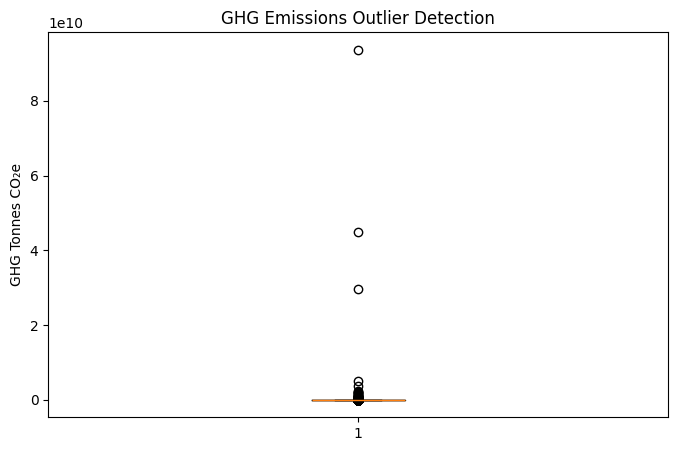

In [55]:
plt.figure(figsize=(8,5))
plt.boxplot(df['Total_ghg_emmissions'].dropna())
plt.title("GHG Emissions Outlier Detection")
plt.ylabel("GHG Tonnes CO₂e")
plt.show()

## What is the spread of throughput per facility?

In [27]:
throughput_cols = ['throughputTonneQ0','throughputTonneQ2','throughputTonneQ3']
df[throughput_cols].describe()  

C:\Users\hagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\hagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\hagar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,throughputTonneQ0,throughputTonneQ2,throughputTonneQ3
count,5.742960e+05,5.742960e+05,5.742960e+05
mean,inf,inf,inf
std,NaN,NaN,NaN
min,8.098214e-11,8.098214e-11,8.098214e-11
25%,1.962375e+02,4.190191e+02,5.888033e+02
50%,1.962375e+02,4.190191e+02,5.888033e+02
75%,1.962375e+02,4.190191e+02,5.888033e+02
max,inf,inf,inf


In [28]:
df['throughput_spread'] = df['throughputTonneQ3'] - df['throughputTonneQ0']
top_spread = df.sort_values(by='throughput_spread', ascending=False).head(10)
print(top_spread[['registryID', 'name', 'throughputTonneQ0', 'throughputTonneQ2', 'throughputTonneQ3', 'throughput_spread']])


           registryID                             name  throughputTonneQ0  \
59284  110041108299.0              ARCRFT 10TH RAY LAB       2.342781e+05   
87015  110007338602.0          IA CONSTRCTN ZELIENOPLE       4.723656e+07   
85419  110000330044.0             BEDFORD MATL BEDFORD       1.814000e+07   
85423  110000330044.0             BEDFORD MATL BEDFORD       1.814000e+07   
57165  110017431233.0                      CALPORTLAND       1.395385e+10   
85422  110000330044.0             BEDFORD MATL BEDFORD       9.070000e+06   
85418  110000330044.0             BEDFORD MATL BEDFORD       9.070000e+06   
50318  110011575189.0  TOBYHANNA ARMY DEP TRAN STA 2ND       9.614200e+07   
48081  110016745940.0                 GLENCORE RECYCLE       8.770300e+00   
41803  110001947877.0                       AGGRGT IND       7.621849e+01   

       throughputTonneQ2  throughputTonneQ3  throughput_spread  
59284                inf                inf                inf  
87015       1.049762e+

C:\Users\hagar\AppData\Local\Temp\ipykernel_7288\728072793.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


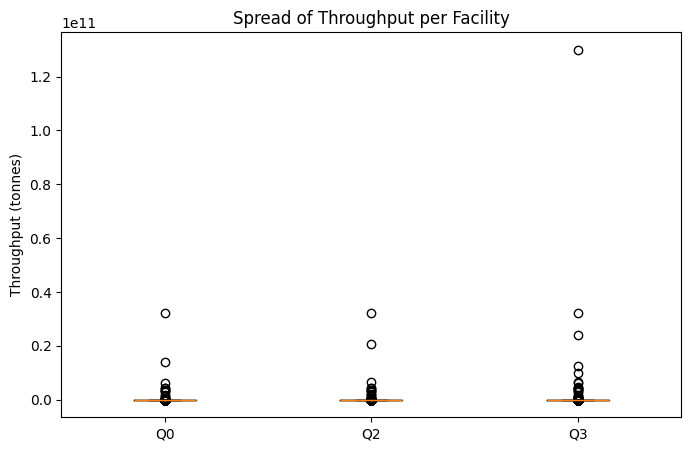

In [10]:
plt.figure(figsize=(8,5))
plt.boxplot([
    df['throughputTonneQ0'],
    df['throughputTonneQ2'],
    df['throughputTonneQ3']
], labels=['Q0','Q2','Q3'])
plt.title("Spread of Throughput per Facility")
plt.ylabel("Throughput (tonnes)")
plt.show()


## Are there facilities with extreme throughput values?

In [ ]:
# Extremly high throughput outliers

Q1 = df['throughputTonneQ3'].quantile(0.25)
Q3 = df['throughputTonneQ3'].quantile(0.75)
IQR = Q3 - Q1
extreme_throughput = df[df['throughputTonneQ3'] > Q3 + 1.5*IQR]
print(extreme_throughput[['registryID', 'name', 'throughputTonneQ0', 'throughputTonneQ2', 'throughputTonneQ3']])

           registryID                            name  throughputTonneQ0  \
38     110000607406.0               RECOT KERN FACLTY        3101.940000   
185    110013863275.0                            <NA>          66.279932   
577    110063968069.0                       PARK PAVE           0.037058   
636    110000382176.0  RED COLLAR PET FOOD 0124010128       79848.981818   
787    110000308060.0                            <NA>        2249.360000   
...               ...                             ...                ...   
94351  110056972370.0                            SWVA      120922.559273   
94352  110056972370.0                            SWVA      241845.201000   
94353  110056972370.0                            SWVA        7595.218000   
94357  110056972370.0                            SWVA        1879.339139   
94358  110056972370.0                            SWVA        3497.392000   

       throughputTonneQ2  throughputTonneQ3  
38          17159.643682       31218.1715

In [31]:
# Extremly low throughput outliers

Q1 = df['throughputTonneQ0'].quantile(0.25)
Q3 = df['throughputTonneQ0'].quantile(0.75)
IQR = Q3 - Q1
extreme_throughput = df[df['throughputTonneQ3'] > Q3 + 1.5*IQR]
print(extreme_throughput[['registryID', 'name', 'throughputTonneQ0', 'throughputTonneQ2', 'throughputTonneQ3']])

            registryID                        name  throughputTonneQ0  \
0       110041038098.0               LENTHOR ENGRG         196.237541   
1       110070522664.0           BIMBO BAKERIES US         196.237541   
3       110042051089.0                        <NA>         196.237541   
4       110000427538.0                 POLARIS IND         196.237541   
5       110000427538.0                 POLARIS IND         196.237541   
...                ...                         ...                ...   
574291  110071648305.0           NEWCASTLE GAS PLT         196.237541   
574292  110071648309.0  EXXONMOBIL BLCK CYN FACLTY         196.237541   
574293  110071648456.0           BUCKING HORSE PLT         196.237541   
574294  110071648563.0                LINCOLN ROAD         196.237541   
574295  110071648755.0             ANTICLINE DSPSL         196.237541   

        throughputTonneQ2  throughputTonneQ3  
0               419.01906         588.803324  
1               419.01906    

## What are typical weekly operating hours per unit?

In [22]:
# Define columns for clarity
hours_cols = ['weeklyOpHours_q1','weeklyOpHours_q2','weeklyOpHours_q3','weeklyOpHours_q4']

# Calculate average
df['avg_weekly_hours'] = df[hours_cols].mean(axis=1)

# Stats
weekly_stats = df['avg_weekly_hours'].describe()
print("Typical weekly operating hours per unit:\n", weekly_stats)

Typical weekly operating hours per unit:
 count    574296.000000
mean         69.698724
std          16.450116
min          31.050000
25%          65.000000
50%          66.325000
75%          66.325000
max         166.500000
Name: avg_weekly_hours, dtype: float64


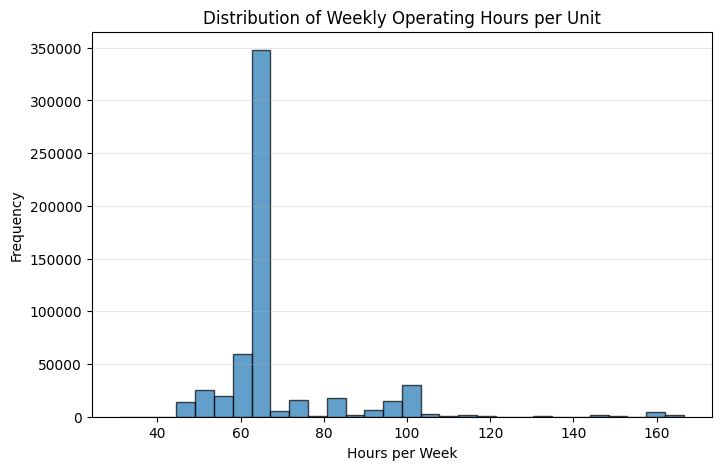

In [23]:
plt.figure(figsize=(8,5))
plt.hist(df['avg_weekly_hours'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Weekly Operating Hours per Unit")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()

## Are there units operating unusually long or short hours?

In [33]:
Q1 = df['avg_weekly_hours'].quantile(0.25)
Q3 = df['avg_weekly_hours'].quantile(0.75)
IQR = Q3 - Q1

short_hours = df[df['avg_weekly_hours'] < Q1 - 1.5*IQR]
long_hours = df[df['avg_weekly_hours'] > Q3 + 1.5*IQR]

In [34]:
print(f"Units with unusually short hours: {len(short_hours)}")
print(short_hours[['registryID', 'name', 'avg_weekly_hours']].head(10))

Units with unusually short hours: 120725
        registryID                   name  avg_weekly_hours
4   110000427538.0            POLARIS IND            53.225
5   110000427538.0            POLARIS IND            53.225
6   110000427538.0            POLARIS IND            53.225
9   110056933216.0            VALMONT IND            62.150
10  110000427538.0            POLARIS IND            53.225
15  110001505586.0  CONSOLIDATED CONCRETE            51.350
16  110000748022.0      ELSTER AMER METER            54.525
17  110000748022.0      ELSTER AMER METER            54.525
22  110007601997.0   MARVIN LMBR AND CEDR            54.000
23  110000427538.0            POLARIS IND            53.225


In [35]:
print(f"Units with unusually long hours: {len(long_hours)}")
print(long_hours[['registryID', 'name', 'avg_weekly_hours']].head(10))

Units with unusually long hours: 107200
        registryID                     name  avg_weekly_hours
1   110070522664.0        BIMBO BAKERIES US           102.600
2   110000426913.0               3M NEW ULM            73.775
8   110003748776.0  LAND OLAKES ARDEN HILLS            97.450
14  110006416137.0             CARLEY FNDRY            69.975
18  110000448178.0          EMPIRICAL FOODS            97.450
19  110000448178.0          EMPIRICAL FOODS            97.450
21  110008822845.0       HAPPYS POTATO CHIP           111.025
24  110000426664.0                 BIG GAIN           102.600
29  110056610403.0           GNRL MILLS OPR            97.450
30  110001319485.0           PROSPECT FNDRY            69.975


## Are there NAICS codes or fuel types concentrated in certain states?

In [5]:
naics_state = df.groupby(['stateCode', 'naicsSector']).size().reset_index(name='count')
top_naics = naics_state.sort_values(['stateCode','count'], ascending=[True, False]).groupby('stateCode').head(1)
print("Top NAICS code per state:\n", top_naics)

Top NAICS code per state:
     stateCode                                    naicsSector  count
3          AK  Mining, Quarrying, and Oil and Gas Extraction    763
5          AL                                   Construction   7245
10         AR                                  Manufacturing   3074
14         AZ                                  Manufacturing   2972
18         CA                                  Manufacturing  52652
23         CO  Mining, Quarrying, and Oil and Gas Extraction  20212
26         CT                                  Manufacturing   2604
29         DC                                   Construction    179
34         DE                                  Manufacturing   1735
38         FL                                  Manufacturing   9773
42         GA                                  Manufacturing   7815
46         HI                                  Manufacturing    495
50         IA                                  Manufacturing   5244
54         ID        

<Figure size 1200x600 with 0 Axes>

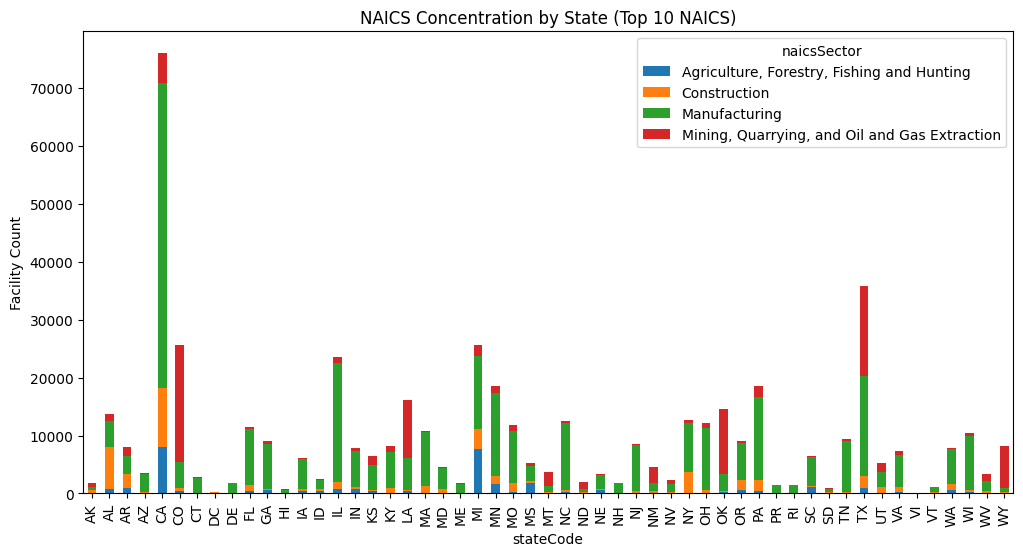

In [26]:
plt.figure(figsize=(12,6))
pd.crosstab(df['stateCode'], df['naicsSector']).iloc[:, :10].plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("NAICS Concentration by State (Top 10 NAICS)")
plt.ylabel("Facility Count")
plt.show()

In [6]:
fuel_state = df.groupby(['stateCode', 'fuelTypeStd']).size().reset_index(name='count')
top_fuel = fuel_state.sort_values(['stateCode','count'], ascending=[True, False]).groupby('stateCode').head(1)
print("Top fuel type per state:\n", top_fuel)

Top fuel type per state:
     stateCode fuelTypeStd  count
3          AK  naturalGas   1588
12         AL  naturalGas  13558
20         AR  naturalGas   7955
28         AZ  naturalGas   3453
36         CA  naturalGas  72685
44         CO  naturalGas  25413
50         CT  naturalGas   2697
52         DC  naturalGas    322
56         DE  naturalGas   1778
64         FL  naturalGas  11222
72         GA  naturalGas   8738
78         HI  naturalGas    705
87         IA  naturalGas   5850
96         ID  naturalGas   2456
104        IL  naturalGas  23263
114        IN  naturalGas   7625
121        KS  naturalGas   6442
129        KY  naturalGas   7535
137        LA  naturalGas  15755
146        MA  naturalGas  10428
154        MD  naturalGas   4500
162        ME  naturalGas   1584
171        MI  naturalGas  25301
180        MN  naturalGas  17578
188        MO  naturalGas  11714
194        MS  naturalGas   5079
202        MT  naturalGas   3542
211        NC  naturalGas  11386
219        ND  na

<Figure size 1200x600 with 0 Axes>

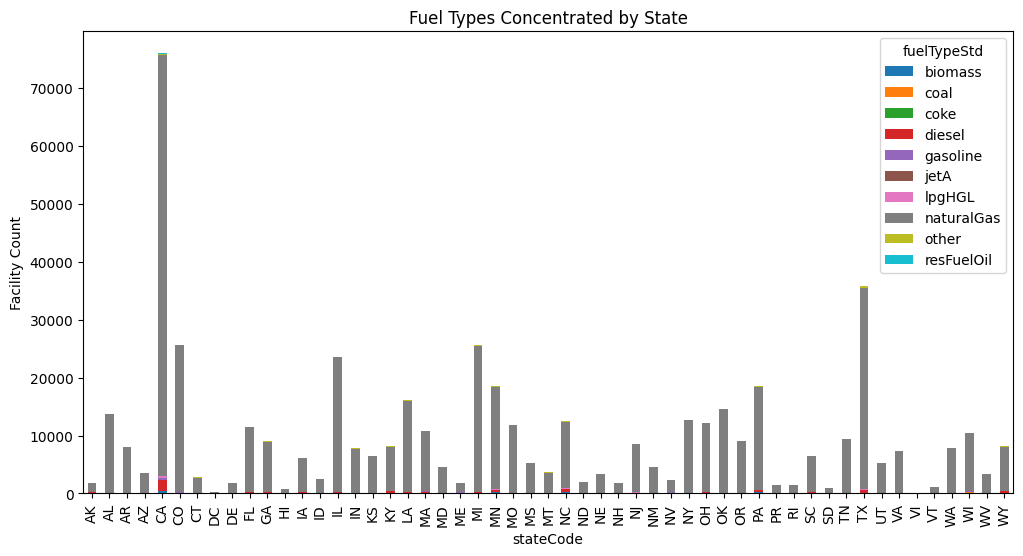

In [8]:
plt.figure(figsize=(12,6))
pd.crosstab(df['stateCode'], df['fuelTypeStd']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Fuel Types Concentrated by State")
plt.ylabel("Facility Count")
plt.show()